In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("sdss_100k_galaxy_form_burst.csv", header=1)
df.head()
                 

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,class,subclass,redshift,redshift_err
0,1237646587710669400,8175185722644649984,82.038679,0.847177,21.73818,20.26633,19.32409,18.64037,18.23833,2.007378,...,19.43575,0.099951,0.311864,0.289370,0.270588,0.187182,GALAXY,STARFORMING,0.067749,0.000015
1,1237646588247540577,8175186822156277760,82.138894,1.063072,20.66761,19.32016,18.67888,18.24693,18.04122,5.403369,...,18.85012,0.366549,0.516876,0.517447,0.552297,0.636966,GALAXY,STARFORMING,0.105118,0.000010
2,1237646588247540758,8175187097034184704,82.028510,1.104003,23.63531,21.19671,19.92297,19.31443,18.68396,0.295693,...,19.42235,0.050000,0.417137,0.506950,0.549881,0.370166,GALAXY,STARFORMING,0.234089,0.000030
3,1237648702973083853,332152325571373056,198.544469,-1.097059,20.12374,18.41520,17.47202,17.05297,16.72423,8.920645,...,18.03204,0.310763,0.356827,0.389345,0.388160,0.416660,GALAXY,STARFORMING,0.110825,0.000030
4,1237648702973149350,332154249716721664,198.706864,-1.046217,-9999.00000,-9999.00000,18.37762,18.13383,17.78497,0.000000,...,19.02880,-9999.000000,-9999.000000,0.050000,0.050000,0.149973,GALAXY,STARFORMING,0.136658,0.000021


In [3]:
df.shape

(100000, 43)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   objid         100000 non-null  int64  
 1   specobjid     100000 non-null  uint64 
 2   ra            100000 non-null  float64
 3   dec           100000 non-null  float64
 4   u             100000 non-null  float64
 5   g             100000 non-null  float64
 6   r             100000 non-null  float64
 7   i             100000 non-null  float64
 8   z             100000 non-null  float64
 9   modelFlux_u   100000 non-null  float64
 10  modelFlux_g   100000 non-null  float64
 11  modelFlux_r   100000 non-null  float64
 12  modelFlux_i   100000 non-null  float64
 13  modelFlux_z   100000 non-null  float64
 14  petroRad_u    100000 non-null  float64
 15  petroRad_g    100000 non-null  float64
 16  petroRad_i    100000 non-null  float64
 17  petroRad_r    100000 non-null  float64
 18  petro

In [5]:
df.isnull().sum()

objid           0
specobjid       0
ra              0
dec             0
u               0
g               0
r               0
i               0
z               0
modelFlux_u     0
modelFlux_g     0
modelFlux_r     0
modelFlux_i     0
modelFlux_z     0
petroRad_u      0
petroRad_g      0
petroRad_i      0
petroRad_r      0
petroRad_z      0
petroFlux_u     0
petroFlux_g     0
petroFlux_i     0
petroFlux_r     0
petroFlux_z     0
petroR50_u      0
petroR50_g      0
petroR50_i      0
petroR50_r      0
petroR50_z      0
psfMag_u        0
psfMag_r        0
psfMag_g        0
psfMag_i        0
psfMag_z        0
expAB_u         0
expAB_g         0
expAB_r         0
expAB_i         0
expAB_z         0
class           0
subclass        0
redshift        0
redshift_err    0
dtype: int64

In [6]:
df['subclass'].replace(['STARFORMING','STARBURST'],[0,1], inplace=True)

In [7]:
df.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,modelFlux_u,...,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,subclass,redshift,redshift_err
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237659e+18,2.303595e+18,180.577802,23.472475,18.518622,17.258221,16.821739,16.362611,15.850865,30.683321,...,18.020203,17.435735,-0.603667,-0.522111,-0.309462,-0.410153,-0.740964,0.250070,0.116753,0.000179
std,6.103756e+12,2.531359e+18,75.751994,21.140744,105.082004,105.069066,95.035474,100.171155,114.206165,76.552859,...,100.181687,114.218604,104.870665,104.871474,94.860919,99.991654,114.005927,0.433055,0.100169,0.052189
min,1.237646e+18,2.994897e+17,0.008745,-11.244273,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-47.451720,...,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.000000,-0.000833,0.000002
25%,1.237655e+18,8.130687e+17,138.741880,3.120118,18.762215,17.505868,16.898845,16.527097,16.281327,9.288132,...,18.295627,17.991602,0.299999,0.398705,0.418789,0.418656,0.381288,0.000000,0.055836,0.000008
50%,1.237659e+18,1.457564e+18,181.492972,20.913596,19.349715,18.072640,17.459080,17.091385,16.861105,18.195690,...,18.845780,18.563315,0.508688,0.588335,0.604795,0.604254,0.575397,0.000000,0.085850,0.000011
75%,1.237663e+18,2.367902e+18,223.851863,42.259965,20.079470,18.656182,17.926918,17.592650,17.453848,31.259628,...,19.586577,19.299430,0.699907,0.768804,0.773924,0.773119,0.752311,1.000000,0.135148,0.000015
max,1.237681e+18,1.412691e+19,359.997922,68.695258,30.960000,30.420980,31.173560,30.562360,28.553240,7915.306000,...,25.966680,27.043280,1.000000,1.000000,0.999999,1.000000,0.999998,1.000000,0.572899,16.503710


In [8]:
sub=df["subclass"].value_counts()
sub


subclass
0    74993
1    25007
Name: count, dtype: int64

In [9]:
# Replace invalid values -9999 with NaN
df = df.replace([-9999.0, -9999], np.nan)

# Fill missing numeric values with median
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])


array([<Axes: ylabel='count'>], dtype=object)

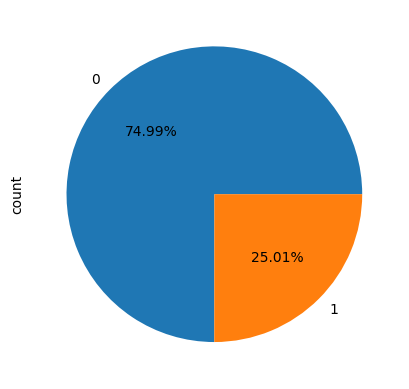

In [10]:
sub.plot(kind="pie",subplots=True,autopct="%1.2f%%")

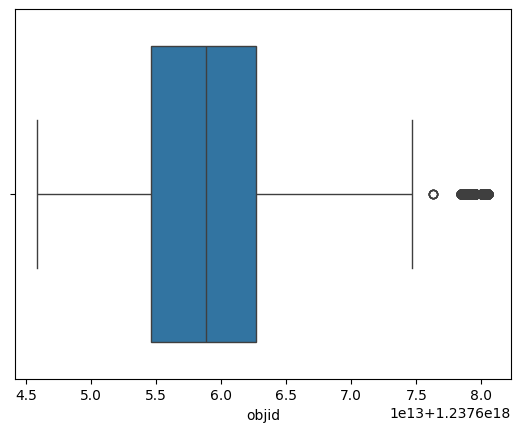

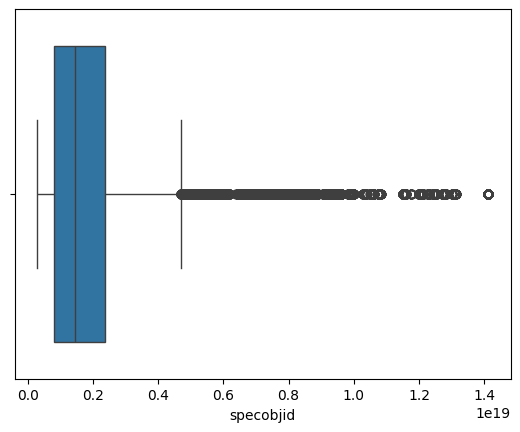

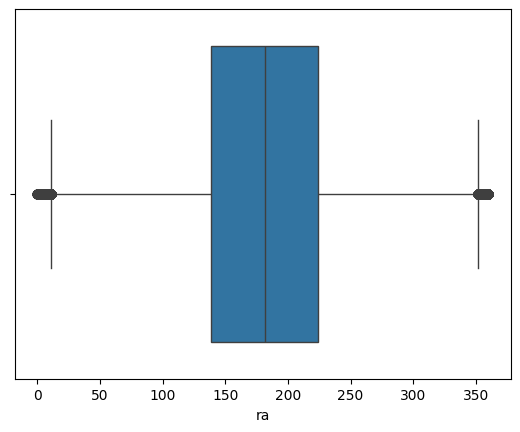

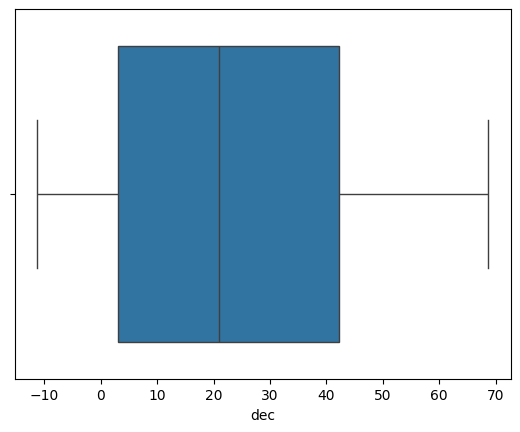

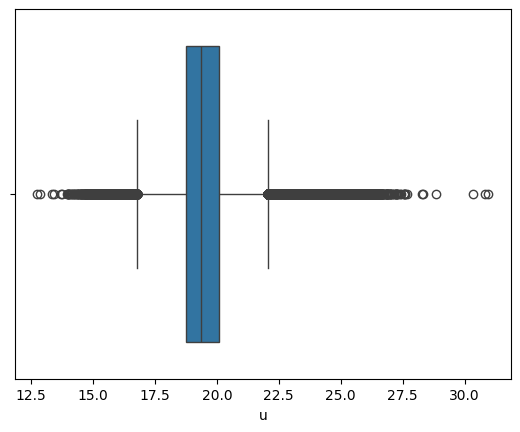

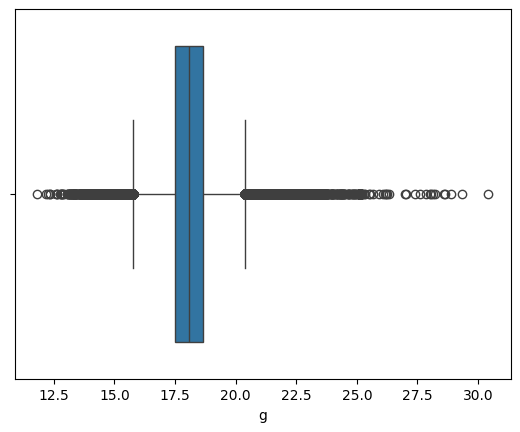

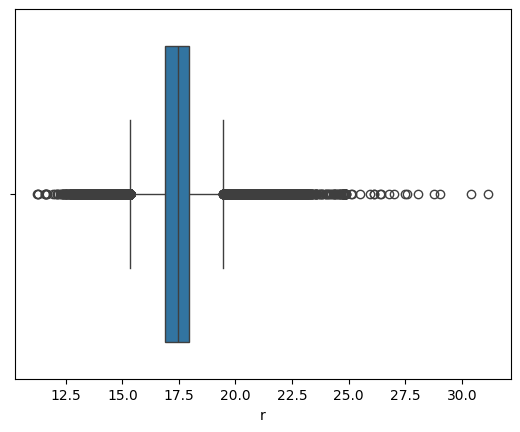

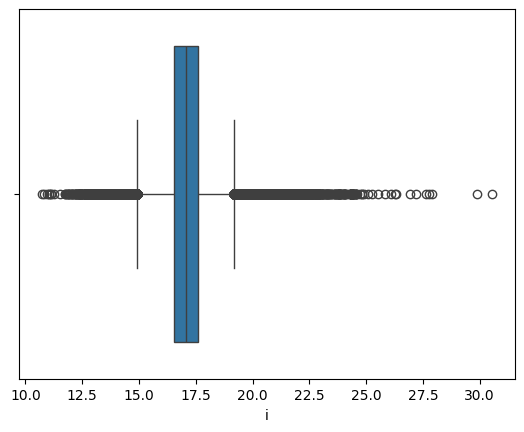

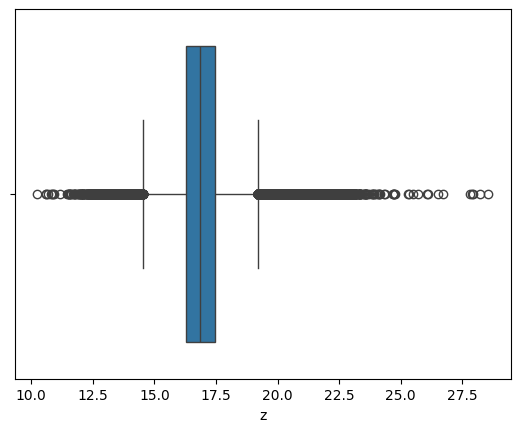

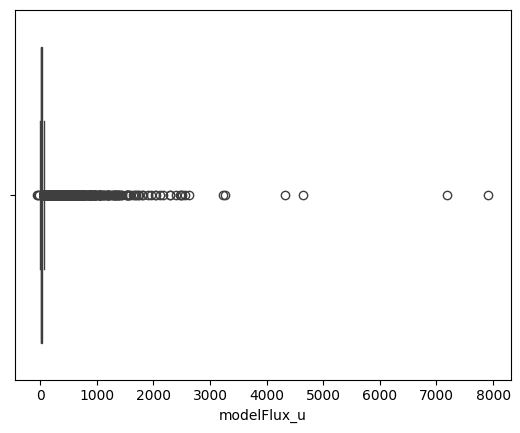

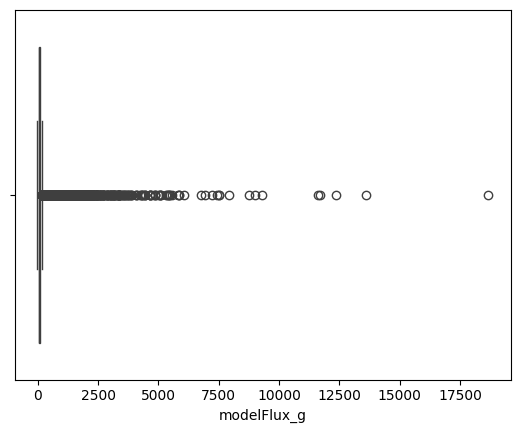

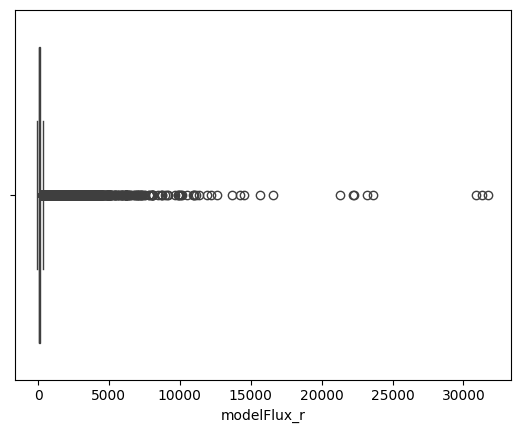

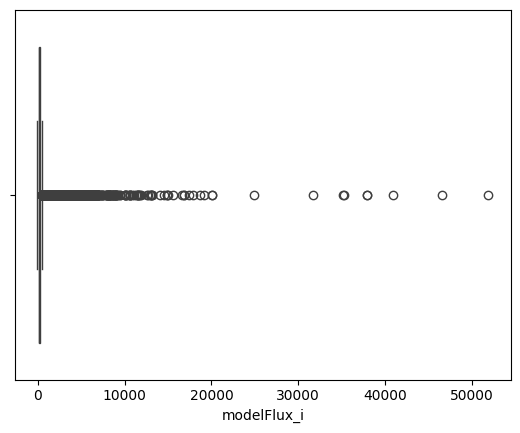

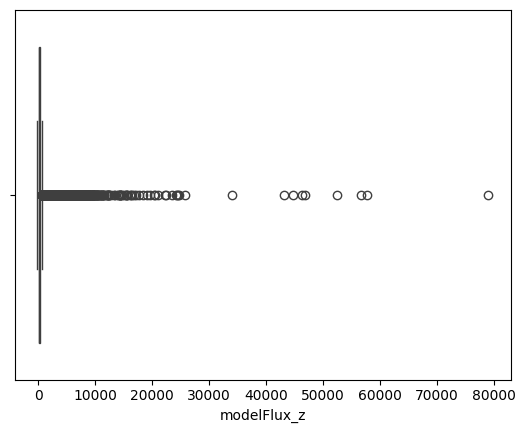

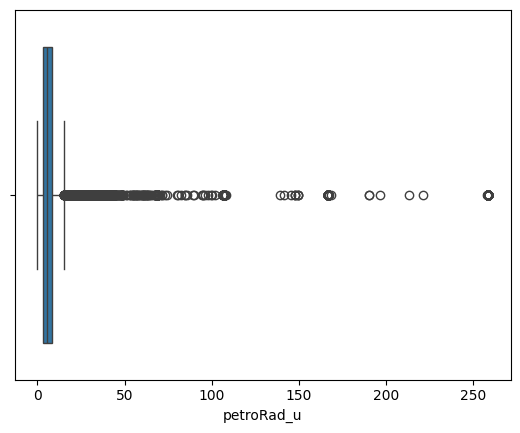

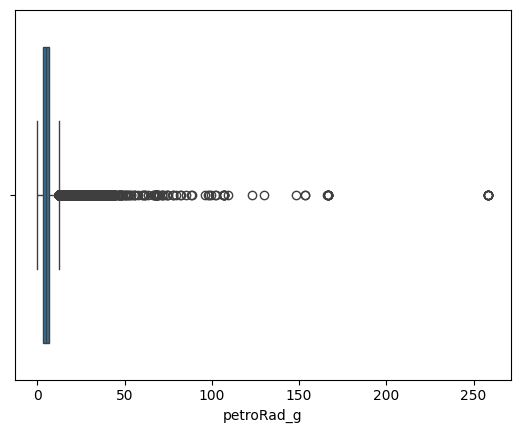

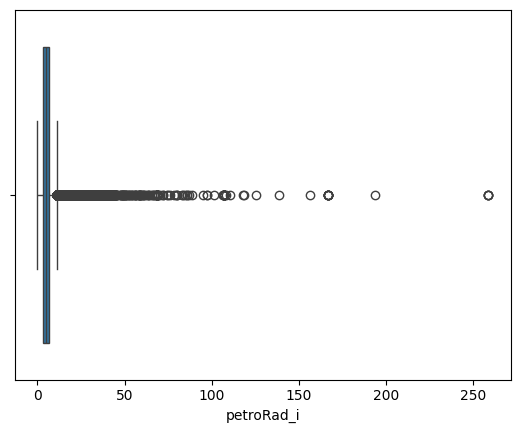

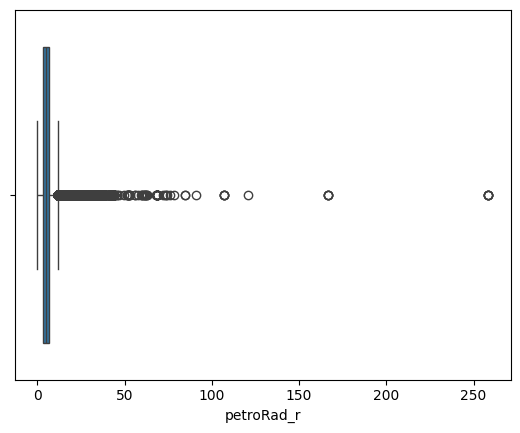

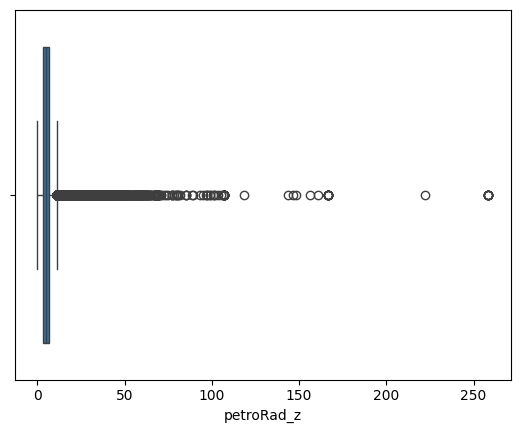

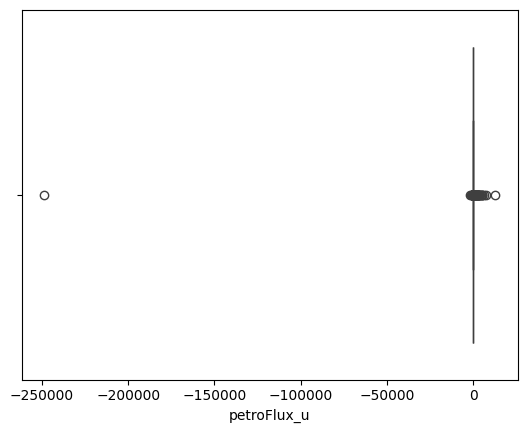

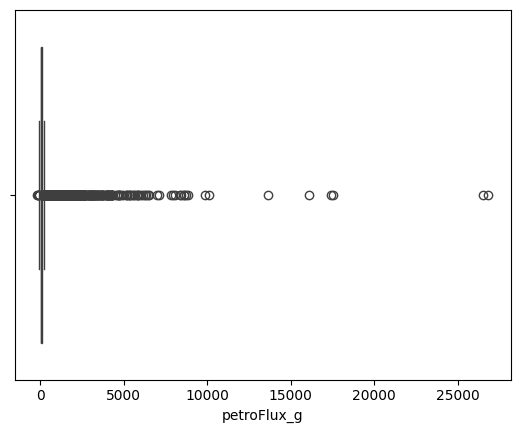

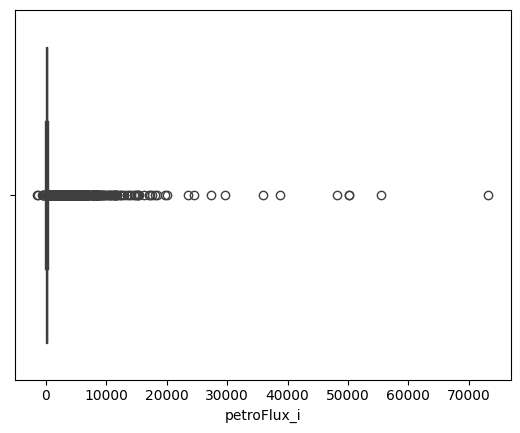

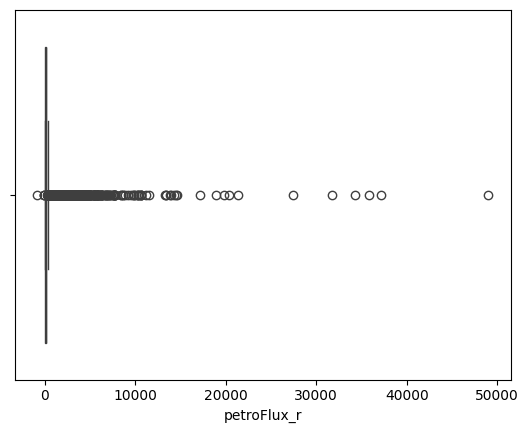

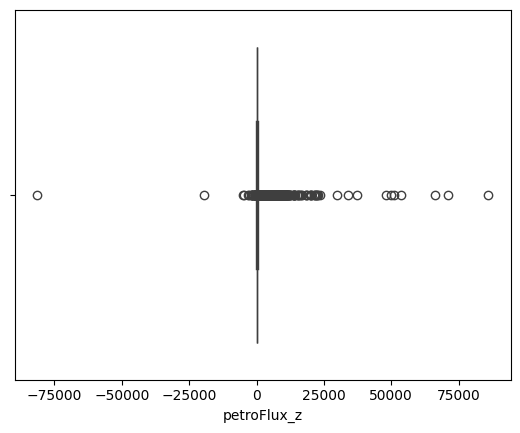

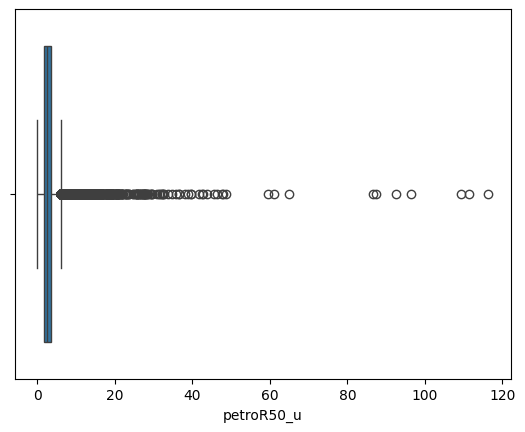

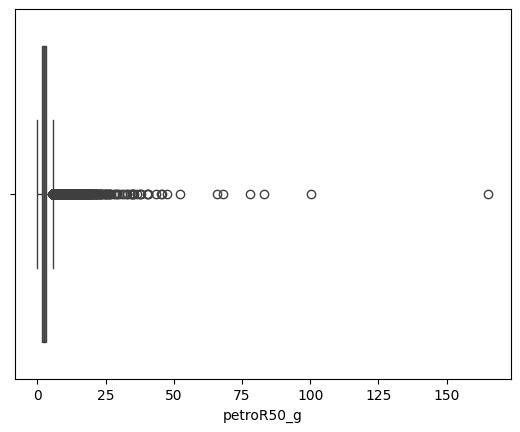

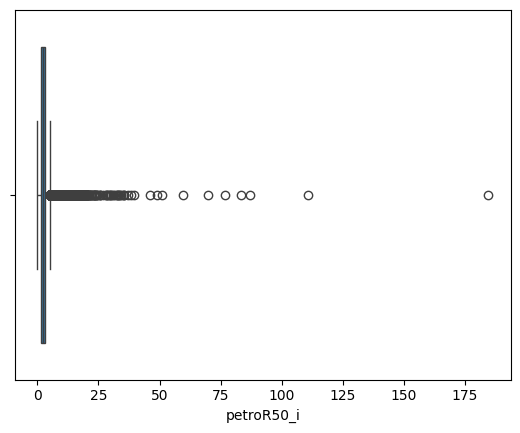

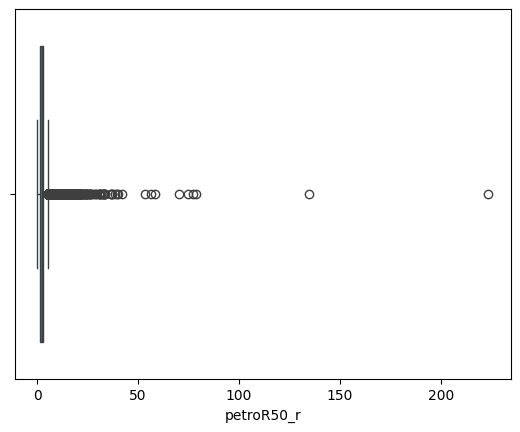

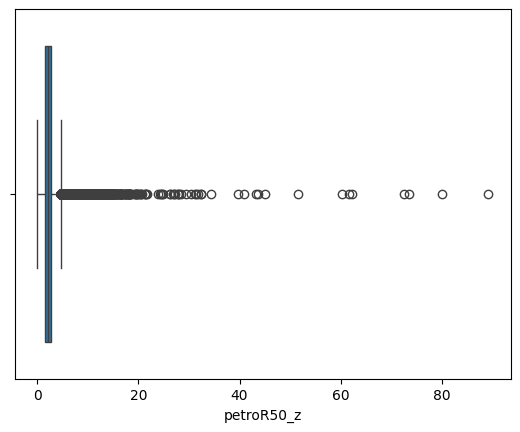

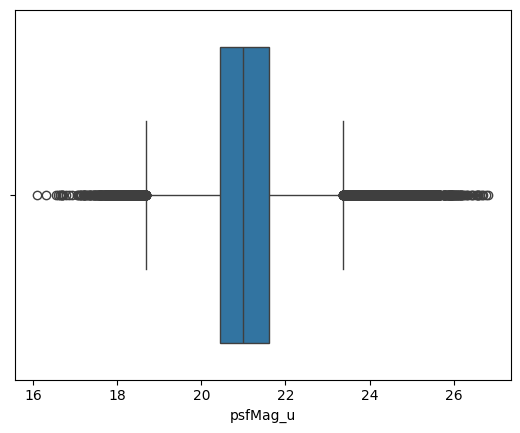

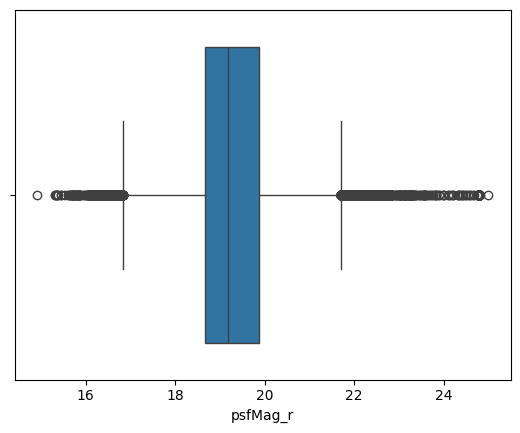

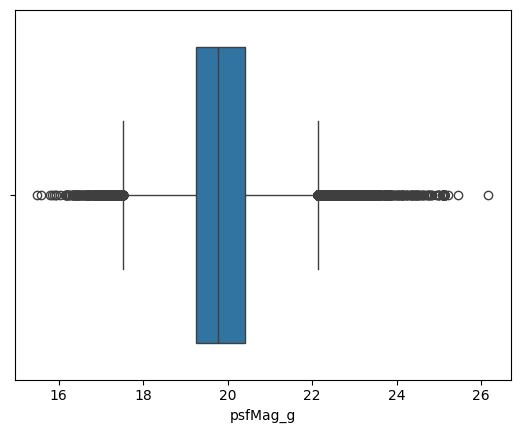

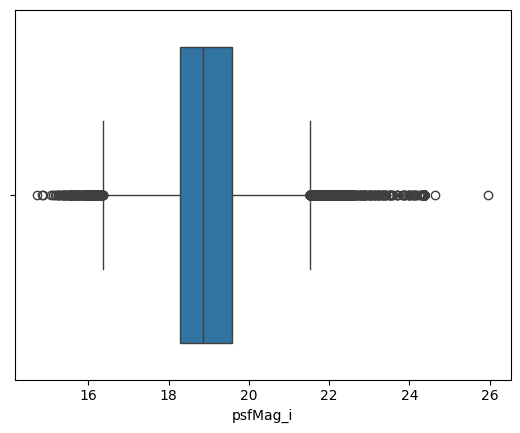

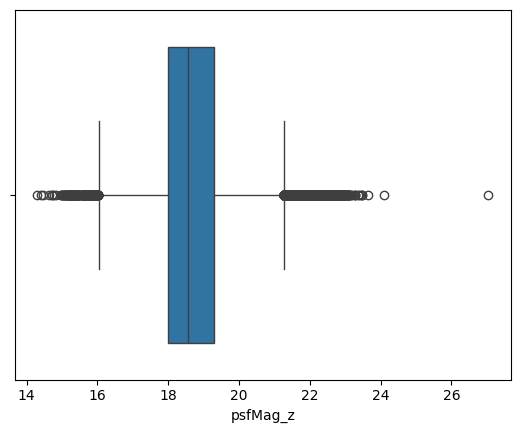

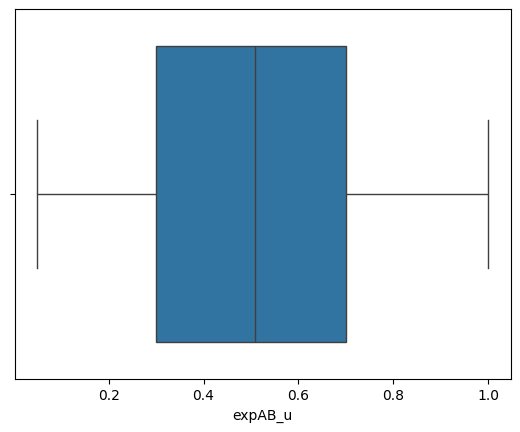

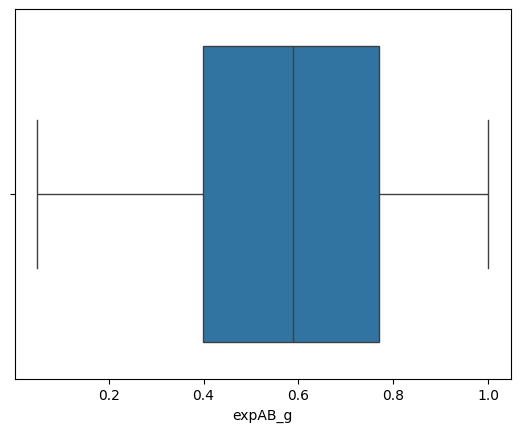

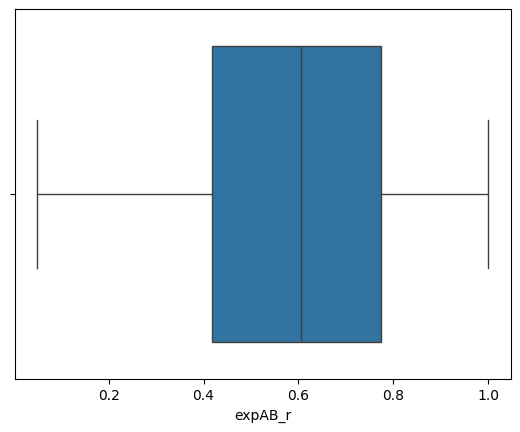

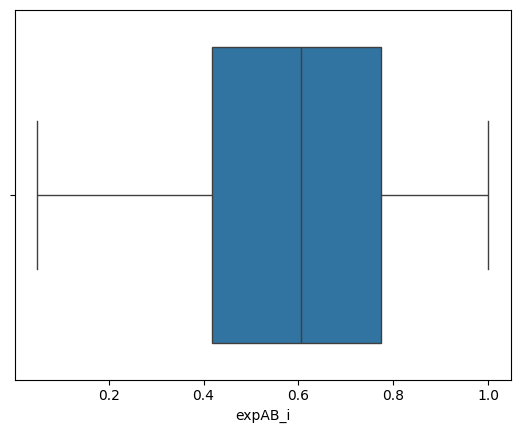

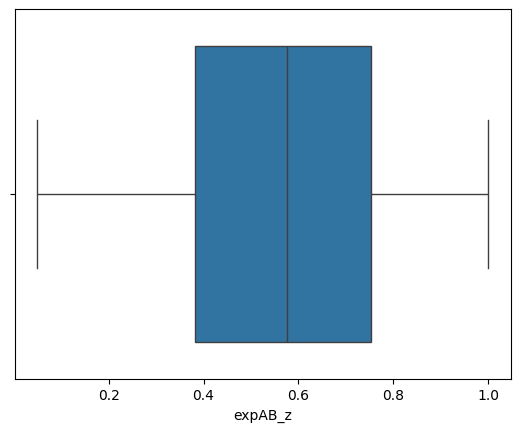

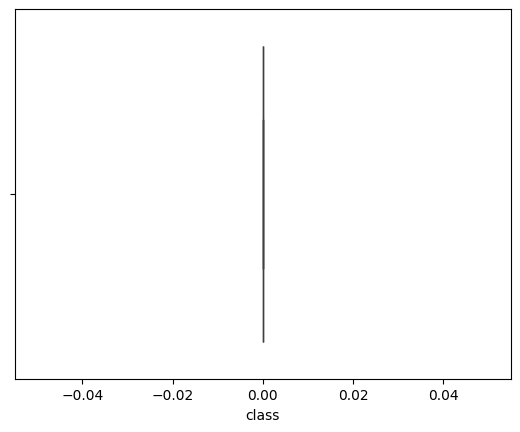

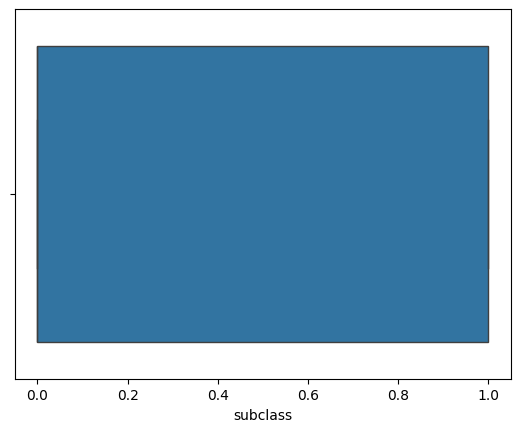

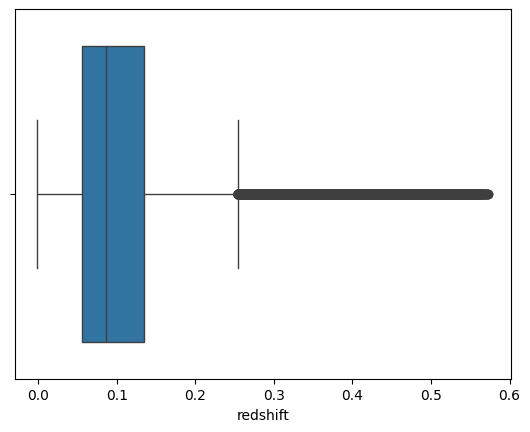

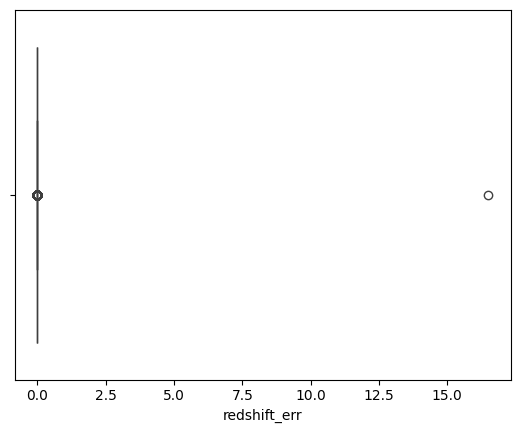

In [11]:
def func(col):
    sns.boxplot(x=col,data=df)
    plt.show()
for i in df.columns:
    func(i)

<Axes: xlabel='subclass', ylabel='i'>

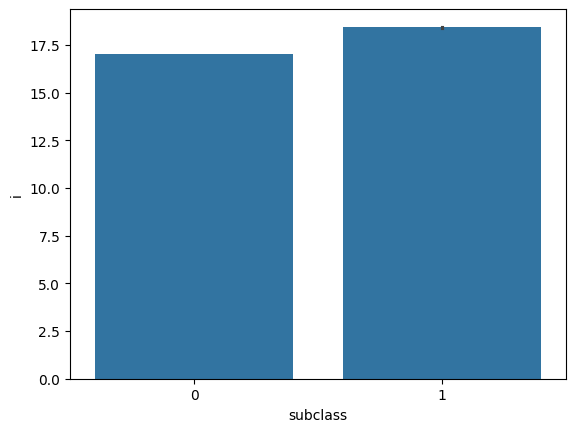

In [12]:
sns.barplot(x='subclass',y='i',data=df)

<Axes: xlabel='subclass', ylabel='z'>

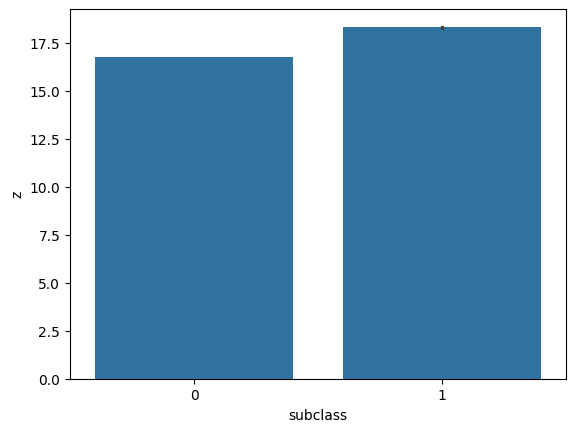

In [13]:
sns.barplot(x='subclass',y='z',data=df)

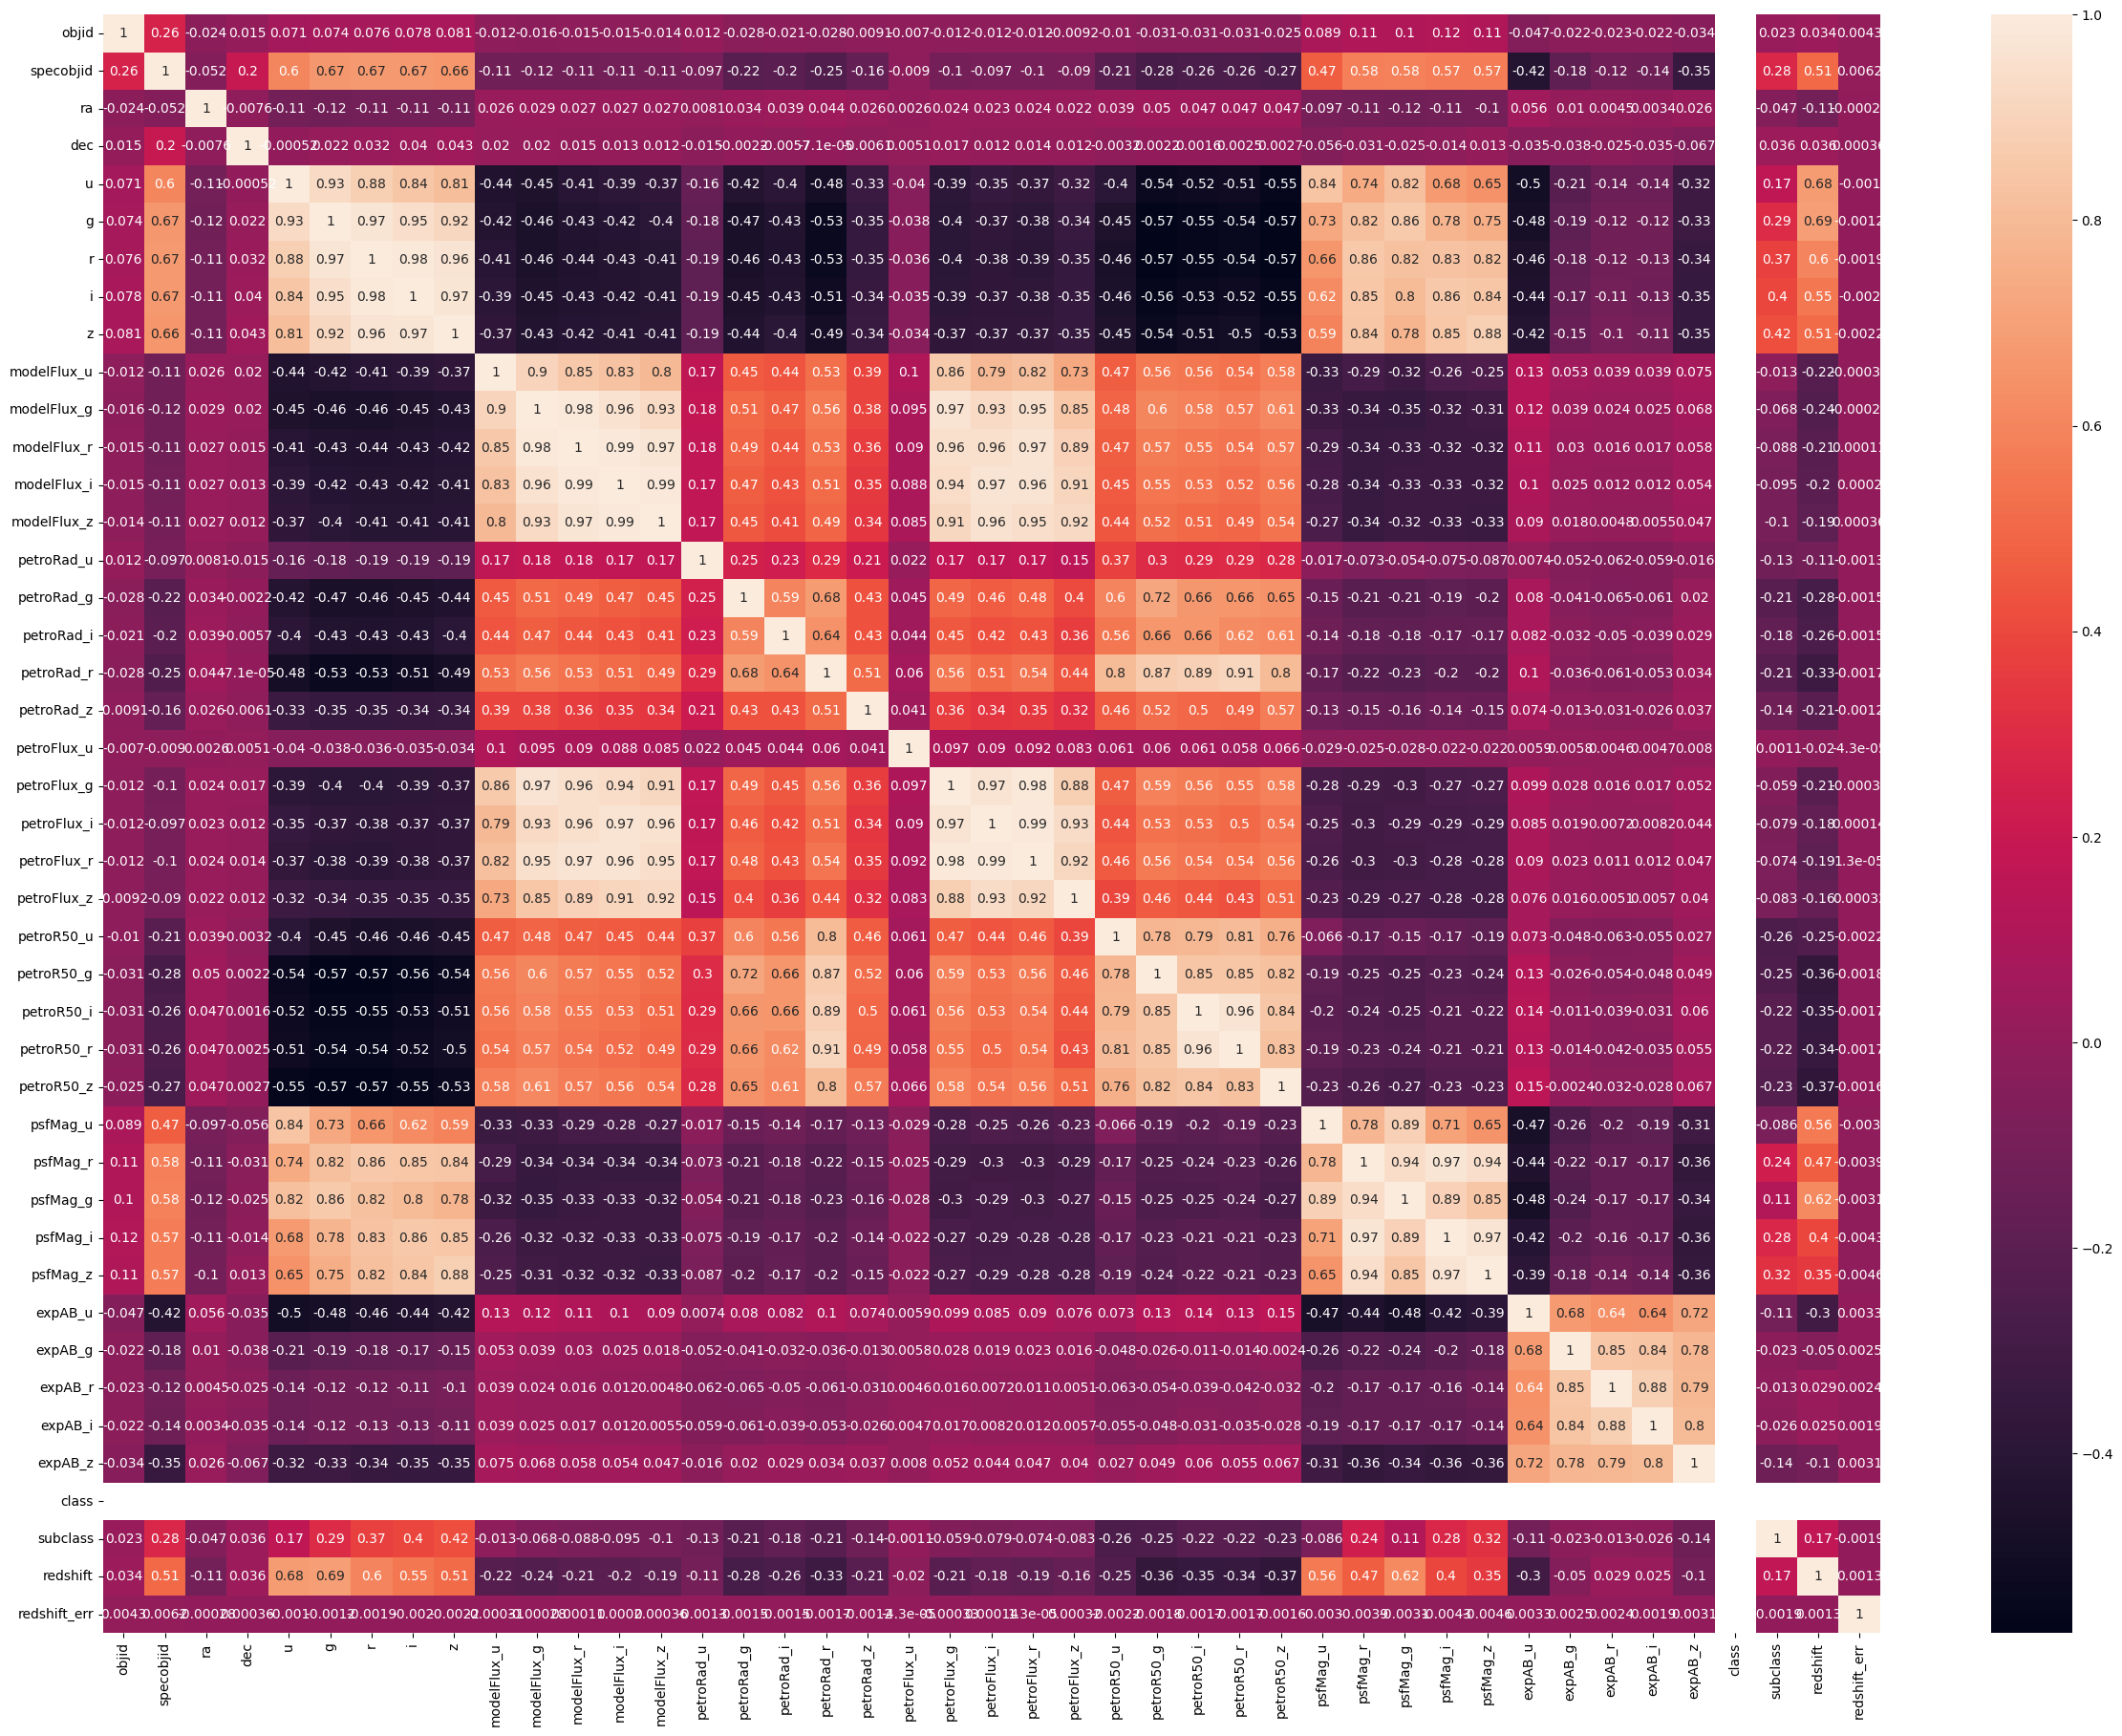

In [14]:
plt.figure(figsize=(30,22))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [15]:
quant=df['u'].quantile(q=[0.75,0.25])
print(quant)
Q3=quant.loc[0.75]
print(Q3)
Q1=quant.loc[0.25]
print(Q1)
IQR=Q3-Q1
print(IQR)
maxwhisker=Q3+1.5*IQR
print(maxwhisker)
miniwhisker=Q1-1.5*IQR
print(miniwhisker)

0.75    20.07947
0.25    18.76252
Name: u, dtype: float64
20.07947
18.76252
1.316950000000002
22.054895000000002
16.787094999999994


In [16]:
df['u']=np.where(df['u']>22.054895, 22.054895,df['u'])
df['u']=np.where(df['u']<16.787095, 16.787095,df['u'])

<Axes: ylabel='u'>

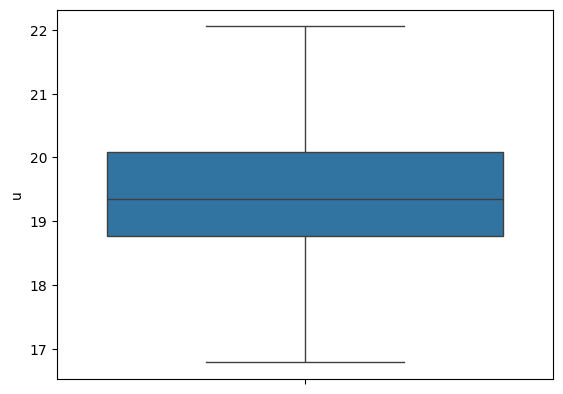

In [17]:
sns.boxplot(y='u',data=df)

In [18]:
x=df.drop(['subclass',], axis=1)
y=df['subclass']
#i want to know top k best columns in the data frame using SelectkBest k = 10
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Assuming x and y are your data and target variables
selector=SelectKBest (score_func=f_classif, k=10) # Select top 10 features
#selector SelectKBest(score_func=chi2, k=10) # For classification tasks with non-negative features
# Fit selector to the data
X_selected=selector.fit_transform(x, y)
#Get the names of the selected features
selected_features=x.columns[selector.get_support()]
# Print the selected features
print("Selected features:", selected_features)

Selected features: Index(['specobjid', 'g', 'r', 'i', 'z', 'petroR50_u', 'petroR50_g', 'psfMag_r',
       'psfMag_i', 'psfMag_z'],
      dtype='object')


In [19]:
# Assuming your target column is 'subclass' in your DataFrame 'df'
X = df.drop(['subclass', 'class'], axis=1)
y = df ['subclass']
# Initialize SMOTE
smote=SMOTE (random_state=42)
# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(x, y)
# Check the new value counts
print(pd.Series (y_resampled).value_counts())

subclass
0    74993
1    74993
Name: count, dtype: int64


In [20]:
df1=df[['i','z','modelFlux_z','petroRad_g','petroRad_r', 'petroFlux_z', 'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'subclass']]
from sklearn.model_selection import train_test_split
x =df1[['i','z', 'modelFlux_z', 'petroRad_g', 'petroRad_r', 'petroFlux_z','petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r']]
y = df1["subclass"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [21]:
from sklearn.preprocessing import StandardScaler
# Create a scaler object
sc = StandardScaler()
# Transform your data
scaled_data = sc.fit_transform(x_train)

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
#Train the classifier on the training data
clf.fit(x_train, y_train)
#Make predictions on the testing data
y_pred=clf.predict(x_test)
#Evaluate the classifier
report=classification_report (y_test, y_pred)
print("classification Report:\n", report)

print(accuracy_score(y_pred,y_test))

classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     14990
           1       0.55      0.57      0.56      5010

    accuracy                           0.78     20000
   macro avg       0.70      0.71      0.71     20000
weighted avg       0.78      0.78      0.78     20000

0.7776


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, confusion_matrix, f1_score
lg=LogisticRegression()
log=lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("-------------------------------------------------")
print("Classification report:\n", classification_report(y_test, y_pred))


print(accuracy_score(y_pred,y_test))

Confusion Matrix: 
 [[14396   594]
 [ 3297  1713]]
-------------------------------------------------
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88     14990
           1       0.74      0.34      0.47      5010

    accuracy                           0.81     20000
   macro avg       0.78      0.65      0.67     20000
weighted avg       0.80      0.81      0.78     20000

0.80545


In [24]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
#Train the Random Forest classifier
RF = RandomForestClassifier()
RF.fit(x_train, y_train)
RFtrain =RF.predict(x_train)
RFtest =RF.predict(x_test)
# Print classification report
confusion_matrix
print(confusion_matrix (RFtrain,y_train))
print(confusion_matrix(RFtest,y_test))
print(classification_report (RFtrain,y_train))
print(classification_report(RFtest,y_test))

print(accuracy_score (RFtrain, y_train))
print(accuracy_score (RFtest,y_test))

[[60003     2]
 [    0 19995]]
[[14011  2166]
 [  979  2844]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     60005
           1       1.00      1.00      1.00     19995

    accuracy                           1.00     80000
   macro avg       1.00      1.00      1.00     80000
weighted avg       1.00      1.00      1.00     80000

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     16177
           1       0.57      0.74      0.64      3823

    accuracy                           0.84     20000
   macro avg       0.75      0.81      0.77     20000
weighted avg       0.86      0.84      0.85     20000

0.999975
0.84275


In [25]:
import pickle
pickle.dump(RF,open("RF.pkl","wb"))

In [26]:
pred1=RF.predict([[16.946170,16.708910, 207.218700, 4.180779, 4.060687,194.731000, 2.141953, 2.149080,2.056686,2.055798]])
print(pred1)

pred2 = RF.predict([[17.675285, 17.52775, 104.25655, 3.397512, 3.424717,
                     90.717547, 1.613005, 1.632243, 1.548225, 1.596137]])
print(pred2)

[0]
[1]


In [27]:
from flask import Flask, request, render_template
import pickle
import numpy as np
import json
import requests
import pandas as pd

In [ ]:
from flask import Flask, request, render_template_string
import pickle
import os

app = Flask(__name__)
model = pickle.load(open("RF.pkl", "rb"))

BASE_DIR = os.getcwd()

@app.route("/")
def home():
    return open(os.path.join(BASE_DIR, "index.html")).read()

@app.route("/predict", methods=["POST"])
def predict():
    features = [
        float(request.form['i']),
        float(request.form['z']),
        float(request.form['modelFlux_z']),
        float(request.form['petroRad_g']),
        float(request.form['petroRad_r']),
        float(request.form['petroFlux_z']),
        float(request.form['petroR50_u']),
        float(request.form['petroR50_g']),
        float(request.form['petroR50_i']),
        float(request.form['petroR50_r'])
    ]

    result = model.predict([features])[0]
    prediction = "starbursting" if result == 1 else "starforming"

    html = open(os.path.join(BASE_DIR, "result.html")).read()
    return render_template_string(html, prediction=prediction)

app.run(port=2222, debug=False, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:2222
Press CTRL+C to quit
